### Instrucciones generales <a class="tocSkip"></a>
1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio privado de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*
1. Se evaluará 
    1. el **resultado y la calidad de su implementación** en base al último commit antes de la fecha y hora de entrega
    1. su **proceso de desarrollo** en base a su histórico de commits
1. [Sean honestos](https://www.acm.org/about-acm/code-of-ethics-in-spanish)

# Tarea 3: Los K-vecinos 

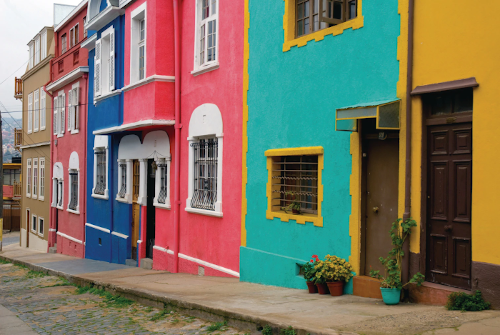

Los $K$-vecinos es un método clásico de aprendizaje de máquinas para hacer clasificación

Sea una base de datos $E = \{(x_j, y_j), j=1, \ldots, N\}$, con $N$ ejemplos donde $x_j \in \mathbb{R}^{D}$ es un atributo d-dimensional e $y_j \in \{0, 1, 2, \ldots, C\}$ son sus etiquetas de clase

Sea ahora una segunda base de datos $T = \{(z_i), i=1, \ldots, M\}$ con $M$ ejemplos donde $z_i \in \mathbb{R}^{D}$ es un atributo d-dimensional. Esta base de datos no tiene etiquetas

> Este método clasifica cada elemento de $T$ en base a las etiquetas de sus $K$ ejemplos más cercanos de la base de datos $E$



Para clasificar el i-esimo elemento de Z:
1. Calculamos la distancia entre $z_i$ y cada elemento de $E$ usando
$$
d(z_i, x_j) = \left ( \sum_{d=1}^D  |z_{id} - x_{jd}|^p \right)^{1/p}
$$
1. Buscamos las $k$ tuplas $(x_k^{(i)}, y_k^{(i)})$ con menor distancia a $z_i$
1. Seleccionamos la clase de $z_i$ según
$$
\text{arg}\max_{c=0, 1, \ldots} \sum_{k=1}^K \frac{\mathbb{1}(c=y^{(i)}_k)}{d(z_i, x^{(i)}_k)}
$$
donde 
$$
\mathbb{1}(a=b) = \begin{cases} 1 & \text{si } a=b \\ 0 &  \text{si } a\neq b \end{cases}
$$
se conoce como función indicadora

Esta versión particular del algoritmo se conoce como clasificador de $k$ vecinos ponderado

# Actividades

- Considere la implementación "inocente" del algoritmo KNN que se adjunta a esta tarea con los parámetros $p$ y $k$ por defecto
    - Use la función adjunta `create_data` para crear un conjunto de N=1000 datos
    - Realice un profiling completo de la función `KNN` usando las magias `timeit`, `prun` y `lprun`
    - Reporte sus resultados y comente sobre los cuellos de botella del algoritmo
- Implemente una nueva versión de la función `KNN`
    - Utilice `Cython` con tipos fijos, vistas de arreglos y funciones de la librería estándar matemática de `C`
    - Muestre que obtiene el mismo resultado que la versión original
    - Grafique el *speed-up* de su nueva función con respecto a la implementación "inocente" original para $N=[10, 50, 100, 500, 1000, 5000, 10000]$
- Usando la nueva versión de `KNN` y un conjunto de $1000$ datos creados con `create_data` realice una validación cruzada en el conjunto $E$ para encontrar el mejor valor de los parámetros $k$ y $p$
- Evalue su clasificador en el conjunto $T$ y haga un reporte completo de resultados. Muestre una gráfica de la frontera de decisión de su clasificador en el rango $[(-2,2), (-2,2)]$

**Justifique adecuadamente todas sus decisiones de diseño**

# Ejemplo generación de datos

<IPython.core.display.Javascript object>


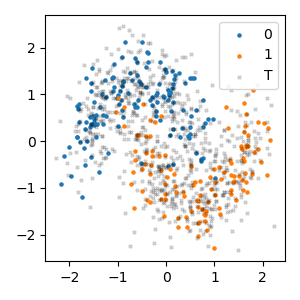

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from funciones import create_data, KNN

fig, ax = plt.subplots(figsize=(3, 3), tight_layout=True)
E, T = create_data(N=1000)
x, y = E # Use E para realizar validación cruzada
for c in np.unique(y):
    mask = y == c
    ax.scatter(x[mask, 0], x[mask, 1], label=c, s=5)
z, w = T # Use las etiquetas w para evaluar sus resultados finales
ax.scatter(z[:, 0], z[:, 1], c='k', s=5, marker='x',  alpha=0.2, label='T')
ax.legend();

In [3]:
print(x)

[[-0.01502026 -1.12752235]
 [ 1.28617644  0.28301094]
 [ 0.26949777  1.44816826]
 [ 0.89971918 -0.76023632]
 [-1.55360379  0.35946093]
 [-1.01510946  0.92548096]
 [ 0.54965325 -0.94949695]
 [-0.64830186 -0.21202125]
 [-0.65935732 -1.43006671]
 [-0.21605777  0.63536898]
 [ 0.69865253 -1.16353426]
 [-1.48108251  0.47353185]
 [ 1.31798273 -0.4139978 ]
 [ 0.12769848  1.14250604]
 [ 1.90311342  0.40908653]
 [-2.16393311 -0.92815279]
 [ 0.6124357  -0.25650548]
 [-0.06299947  0.96480606]
 [-1.58231442  0.29394575]
 [ 0.79616082  0.38174853]
 [-0.64115055 -0.40186325]
 [-1.04160114  0.61523296]
 [ 1.62152574 -0.67799979]
 [ 1.23225686  0.73355361]
 [ 1.64278862 -0.08292656]
 [-1.37879263 -0.6635359 ]
 [-0.01735272 -0.91126848]
 [-0.49822967 -1.05973545]
 [ 0.59984033 -0.88077685]
 [-1.65025989  0.41276521]
 [ 0.51967522  0.53083642]
 [ 0.09367291  0.63855597]
 [ 0.65721564 -1.76170505]
 [ 1.50190458 -0.75309641]
 [ 0.13459527  0.26371519]
 [-1.26269958  1.3067531 ]
 [-0.30189729 -0.51763179]
 

In [4]:
E, T = create_data(N=10)
x, y = E # Use E para realizar validación cruzada
z, _ = T
x
#y
#z
#results= %timeit -r10 -o cython_function_inocente(x, y, z)


array([[ 0.48752557, -1.09503617],
       [-0.674612  ,  1.28056789]])

In [5]:
def KNN(X, Y, Z , k=5, p=2):
    C = np.unique(Y)
    N, D = X.shape
    M, _ = Z.shape
    dist = np.zeros(shape=(M, N))
    for i in range(M):
        for j in range(N):
            dist[i, j] = np.power(np.sum(np.power(np.absolute(Z[i] - X[j]), p)), 1./p)
    neighbours = np.argsort(dist, axis=1)[:, :k]
    Z_Y = np.zeros(shape=(M, ))
    for i in range(M):
        criterion = np.zeros(shape=(len(C),))
        for c in C:
            criterion[c] = np.sum(1./dist[i, neighbours[i]][Y[neighbours[i]] == c])
        Z_Y[i] = np.argmax(criterion)
    return Z_Y

In [6]:
%reload_ext line_profiler
%lprun -f KNN KNN(x,y,z)

Profiling del algoritmo KNN:
    - Para el análisis del algoritmo hicimos uso de la extencion line_profiler usando el lprun para encontrar los diferentes tiempos en cada linea de código correspondiente. De tal acción estos son los resultados relevantes:
    A modo de resumen general el algoritmo tiene dos sectores donde uno supondría que se concentra el trabajo computacional, siendo los dos sectores consistentes en dobles ciclos for. En el primero se hace una evaluación de distancia por el uso de potencias y sumas a arreglos, y la segunda siendo una suma en arreglos. Como de esperarse el tiempo de ejecución del algoritmo se concentra con creces en el del cáculo de distancias, donde lprun arroja  un 95 % aproximado del uso del tiempo computacional en general. Luego de ello tenemos cerca de un 4 % para lo que es el direccionamiento del segundo for de distancia y finalmente cerca de un 1 % en la suma empleada en el segundo sector que teóricamente pensamos que tendría un mayor cuello de botella. En síntesis tenemos que el algoritmo emplea practicamente todo su esfuerzo en calcular las distancias, siendo esta la línea de código de mayor importancia a la hora de mejorar el agloritmo de KNN.

In [7]:
%load_ext cython

In [8]:
%%cython -a -l m
import numpy as np

def cython_function_inocente(X, Y, Z, K=5, p=2.):
    C = np.unique(Y)
    T = len(C)
    N, D = X.shape
    M, _ = Z.shape
    dist = np.zeros(shape=(M, N))
    Z_Y = np.zeros(shape=(M, ))
    
#Operaciones
    for i in range(M):
        #dist[i, j] = np.power(np.sum(np.power(np.absolute(Z[i] - X[j]), p)), 1./p)
        for j in range(N):
            dist[i,j] = 0
            for d in range(D):
                dist[i,j] = dist[i,j] + pow(abs(Z[i][d] - X[j][d]),p)
            dist[i,j] = pow(dist[i,j],1/p)

        #Qicksort o mergesort?    
        neighbours = np.argsort(dist[i])
        
        
        m_a = 0.0
        for j in range(T):
            criterion = 0.0
            #criterion[c] = np.sum(1./dist[i, neighbours[i]][Y[neighbours[i]] == c])
            for k in range(K):
                ind = neighbours[k]
                if(Y[ind] == C[j]):
                    criterion += 1./dist[i,ind]
            if(criterion > m_a):
                m_a = criterion
                Z_Y[i] = C[j] 
    return Z_Y

In [11]:
%%cython -a -l m

import cython
cimport numpy as npc
import numpy as np

ctypedef npc.float64_t TIPO_t
TIPO = np.float64

ctypedef npc.int64_t TIPOI_t
TIPOI = np.int64


#ctypedef npc.float64_t TIPO_INT
#TIPOI = np.int64

from libc.math cimport abs
cdef extern from "math.h":
    TIPO_t pow (TIPO_t, TIPO_t)
    
@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)

def cython_function(TIPO_t [:, ::1] X, TIPOI_t [::1] Y, TIPO_t [:, ::1] Z):#, TIPO_t p, int K):

#Definimos variables a usar
    cdef int K = 5 
    cdef TIPO_t p = 2.
    cdef Py_ssize_t i,j,d,k
    cdef int N = X.shape[0]
    cdef int D = X.shape[1]
    cdef int M = Z.shape[0]
    cdef TIPO_t m_a = 0.0
    cdef TIPO_t m_e = 0
    cdef TIPO_t criterion = 0.0
    cdef TIPO_t ab = 0.0
    #cdef int m = 0
    #cdef int criterion = 0
#Creamos las matrices, esta parte contiene todas las llamadas a numpy
            
    
    dist = np.empty(shape=(M, N), dtype=np.float64)
    cdef TIPO_t [:, ::1] dist_view = dist 
    #cdef TIPO_t [:, ::1] dist = np.empty(shape=(M,N), dtype=TIPO)
    cdef TIPOI_t [::1] neighbours = np.empty(shape=(K,), dtype=TIPOI)
    
    Z_Y = np.empty(shape=(M,), dtype=TIPO)
    cdef TIPO_t [::1] Z_Y_view = Z_Y
    cdef TIPOI_t [::1] C = np.unique(Y)
    
    cdef int T = len(C)
    

#Operaciones
    for i in range(M):
        #dist[i, j] = np.power(np.sum(np.power(np.absolute(Z[i] - X[j]), p)), 1./p)
        for j in range(N):
            dist_view[i,j] = 0
            for d in range(D):
                dist_view[i,j] = dist_view[i,j] + pow(abs(Z[i][d] - X[j][d]),p)
            dist_view[i,j] = pow(dist_view[i,j],1/p)


        neighbours = np.argsort(dist_view[i])
        
        m_a = 0.0
        for j in range(T):
            criterion = 0.0
            #criterion[c] = np.sum(1./dist[i, neighbours[i]][Y[neighbours[i]] == c])
            for k in range(K):
                ind = neighbours[k]
                if(Y[ind] == C[j]):
                    criterion += 1./dist_view[i,ind]
            if(criterion > m_a):
                m_a = criterion
                Z_Y_view[i] = C[j] 
    return Z_Y

In [17]:
print(x)

[[-0.01502026 -1.12752235]
 [ 1.28617644  0.28301094]
 [ 0.26949777  1.44816826]
 [ 0.89971918 -0.76023632]
 [-1.55360379  0.35946093]
 [-1.01510946  0.92548096]
 [ 0.54965325 -0.94949695]
 [-0.64830186 -0.21202125]
 [-0.65935732 -1.43006671]
 [-0.21605777  0.63536898]
 [ 0.69865253 -1.16353426]
 [-1.48108251  0.47353185]
 [ 1.31798273 -0.4139978 ]
 [ 0.12769848  1.14250604]
 [ 1.90311342  0.40908653]
 [-2.16393311 -0.92815279]
 [ 0.6124357  -0.25650548]
 [-0.06299947  0.96480606]
 [-1.58231442  0.29394575]
 [ 0.79616082  0.38174853]
 [-0.64115055 -0.40186325]
 [-1.04160114  0.61523296]
 [ 1.62152574 -0.67799979]
 [ 1.23225686  0.73355361]
 [ 1.64278862 -0.08292656]
 [-1.37879263 -0.6635359 ]
 [-0.01735272 -0.91126848]
 [-0.49822967 -1.05973545]
 [ 0.59984033 -0.88077685]
 [-1.65025989  0.41276521]
 [ 0.51967522  0.53083642]
 [ 0.09367291  0.63855597]
 [ 0.65721564 -1.76170505]
 [ 1.50190458 -0.75309641]
 [ 0.13459527  0.26371519]
 [-1.26269958  1.3067531 ]
 [-0.30189729 -0.51763179]
 

In [18]:
cython_function(x, y, z)

array([1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1.

In [19]:
%timeit -r10 -n1 Z_Y = KNN(x, y, z)
%timeit -r10 -n1 Z_Y = cython_function_inocente(x, y, z)
%timeit -r10 -n1 Z_Y = cython_function(x, y, z)

1.71 s ± 53.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
548 ms ± 8.11 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
22.2 ms ± 1.11 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [20]:
#Se obtiene el mismo resultado que la version original
if(np.allclose(cython_function(x,y,z),KNN(x,y,z))):
    print("Se obtiene el mismo resultado que la version original(KNN)")
else:
    print("No se obtiene el mismo resultado")




Se obtiene el mismo resultado que la version original(KNN)


- Grafique el *speed-up* de su nueva función con respecto a la implementación "inocente" original para $N=[10, 50, 100, 500, 1000, 5000, 10000]$

In [21]:
# Completa aquí

# Midiendo tiempo con %timeit
from funciones import create_data, KNN

# Parte 1
N = [50, 100, 500, 1000, 5000]
#fig, ax = plt.subplots(len(N), 1, figsize=(4, 8), tight_layout=True)
tir= np.zeros((2, 5))
#display(tir)
for i, n in enumerate(N):
    E, T = create_data(n)
    x, y = E # Use E para realizar validación cruzada
    z, w = T
    results= %timeit -r8 -o cython_function_inocente(x, y, z)
    tir[0][i] = results.average
    tir[1][i] = np.std(results.all_runs)
display(tir)

1.64 ms ± 22.9 µs per loop (mean ± std. dev. of 8 runs, 1000 loops each)
6.72 ms ± 374 µs per loop (mean ± std. dev. of 8 runs, 100 loops each)
142 ms ± 2.8 ms per loop (mean ± std. dev. of 8 runs, 10 loops each)
540 ms ± 10.7 ms per loop (mean ± std. dev. of 8 runs, 1 loop each)
13.1 s ± 36.9 ms per loop (mean ± std. dev. of 8 runs, 1 loop each)


array([[1.64272887e-03, 6.71852121e-03, 1.42153149e-01, 5.40125873e-01,
        1.30964727e+01],
       [2.28810762e-02, 3.74338534e-02, 2.79701747e-02, 1.06848688e-02,
        3.69479546e-02]])

In [22]:
# Completa aquí

# Midiendo tiempo con %timeit
from funciones import create_data, KNN

# Parte 1
N = [50, 100, 500, 1000, 5000]
#fig, ax = plt.subplots(len(N), 1, figsize=(4, 8), tight_layout=True)
tirc= np.zeros((2,5))
#display(tir)
for i, n in enumerate(N):
    E, T = create_data(n)
    x, y = E # Use E para realizar validación cruzada
    z, w = T
    results= %timeit -r10 -o cython_function(x, y, z)
    tirc[0][i] = results.average
    tirc[1][i] = np.std(results.all_runs)
display(tirc)

258 µs ± 17.5 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
572 µs ± 9.81 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
6.42 ms ± 225 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
21.8 ms ± 206 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
509 ms ± 2.21 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


array([[2.57917730e-04, 5.72355073e-04, 6.41655153e-03, 2.17670470e-02,
        5.08664766e-01],
       [1.75197756e-02, 9.81168588e-03, 2.25456806e-02, 2.05640860e-03,
        2.20611714e-03]])

<IPython.core.display.Javascript object>


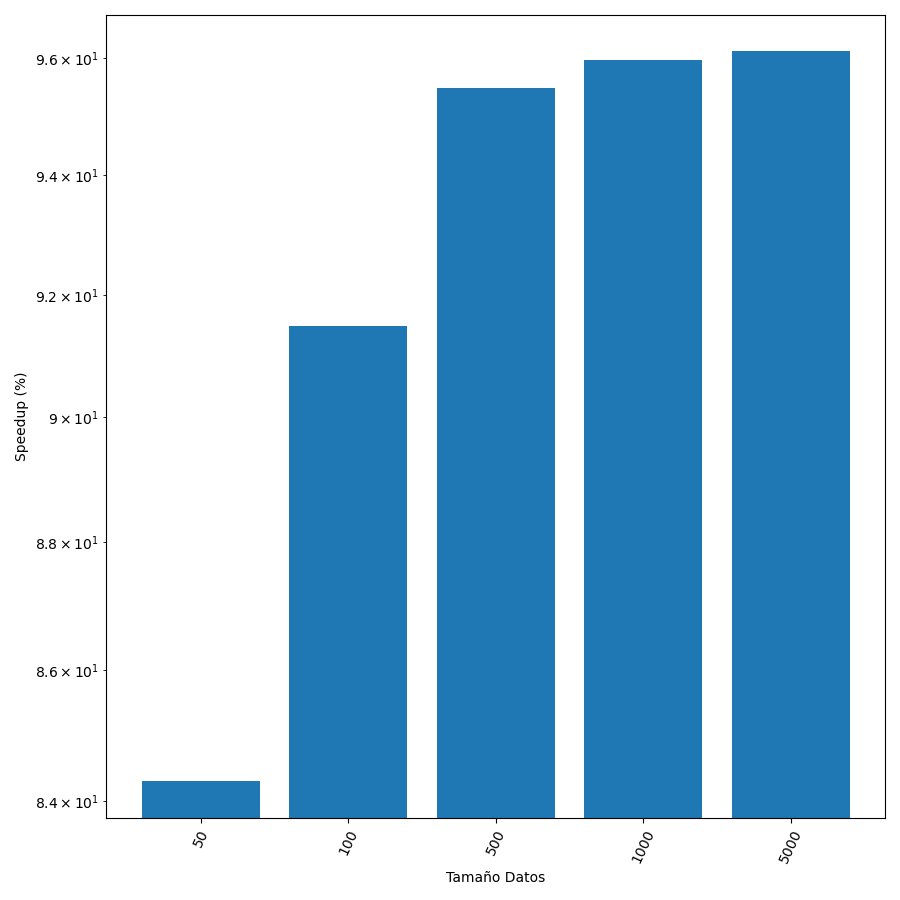

In [23]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(9,9))

speedup =100*np.divide(tir[0]-tirc[0],tir[0])

#speedup
ax.bar(range(5),speedup, align='center')
ax.set_xticks(range(5))
ax.set_xticklabels(N, rotation=65)
ax.set_xlabel('Tamaño Datos')
ax.set_ylabel('Speedup (%)')
ax.set_yscale('log')

- Usando la nueva versión de `KNN` y un conjunto de $1000$ datos creados con `create_data` realice una validación cruzada en el conjunto $E$ para encontrar el mejor valor de los parámetros $k$ y $p$

In [14]:
%%cython -a -l m

import cython
cimport numpy as npc
import numpy as np


ctypedef npc.float64_t TIPO_t
TIPO = np.float64

ctypedef npc.int64_t TIPOI_t
TIPOI = np.int64


#ctypedef npc.float64_t TIPO_INT
#TIPOI = np.int64

from libc.math cimport abs
cdef extern from "math.h":
    TIPO_t pow (TIPO_t, TIPO_t)
    
@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)

def cython_function_PK(TIPO_t [:, ::1] X, TIPOI_t [::1] Y, TIPO_t [:, ::1] Z, TIPO_t p, int K):

#Definimos variables a usar
    cdef Py_ssize_t i,j,d,k
    cdef int N = X.shape[0]
    cdef int D = X.shape[1]
    cdef int M = Z.shape[0]
    cdef TIPO_t m_a = 0.0
    cdef TIPO_t m_e = 0
    cdef TIPO_t criterion = 0.0
    cdef TIPO_t ab = 0.0
    #cdef int m = 0
    #cdef int criterion = 0
#Creamos las matrices, esta parte contiene todas las llamadas a numpy
            
    
    dist = np.empty(shape=(M, N), dtype=np.float64)
    cdef TIPO_t [:, ::1] dist_view = dist 
    #cdef TIPO_t [:, ::1] dist = np.empty(shape=(M,N), dtype=TIPO)
    cdef TIPOI_t [::1] neighbours = np.empty(shape=(K,), dtype=TIPOI)
    
    Z_Y = np.empty(shape=(M,), dtype=TIPO)
    cdef TIPO_t [::1] Z_Y_view = Z_Y
    cdef TIPOI_t [::1] C = np.unique(Y)
    
    cdef int T = len(C)
    

#Operaciones
    for i in range(M):
        #dist[i, j] = np.power(np.sum(np.power(np.absolute(Z[i] - X[j]), p)), 1./p)
        for j in range(N):
            dist_view[i,j] = 0
            for d in range(D):
                dist_view[i,j] = dist_view[i,j] + pow(abs(Z[i][d] - X[j][d]),p)
            dist_view[i,j] = pow(dist_view[i,j],1/p)


        neighbours = np.argsort(dist_view[i])
        
        m_a = 0.0
        for j in range(T):
            criterion = 0.0
            #criterion[c] = np.sum(1./dist[i, neighbours[i]][Y[neighbours[i]] == c])
            for k in range(K):
                ind = neighbours[k]
                if(Y[ind] == C[j]):
                    criterion += 1./dist_view[i,ind]
            if(criterion > m_a):
                m_a = criterion
                Z_Y_view[i] = C[j] 
    return Z_Y

In [15]:
import numpy as np
from sklearn.model_selection import KFold

E, T = create_data(N=1000)
x, y = E
z, w = T
kf = KFold(n_splits=5, random_state=None, shuffle=True)
Errors = np.zeros(shape=(20,20))

for p in range(1,21):
    for k in range (1,21):
        Error = 0
        for train_index, val_index in kf.split(x):
            yhat = cython_function_PK(x[train_index], y[train_index], x[val_index],p,k)
            y_val= y[val_index]
            Error +=  len(y_val[yhat != y_val])
        Errors[p-1][k-1] = Error/5


In [16]:
#Filas(20) = p, columnas(20) = k 
print(Errors)

[[4.  5.  3.6 3.4 3.6 3.2 3.6 2.8 3.2 3.6 3.2 3.  3.  2.8 2.8 2.8 2.6 2.4
  2.6 2.4]
 [5.  4.8 4.  3.6 3.8 3.2 3.8 3.2 3.2 3.  2.8 3.4 2.8 2.6 2.4 2.4 2.8 2.6
  2.4 2.6]
 [4.6 5.2 3.6 3.4 3.6 3.4 3.2 3.2 2.8 2.8 2.6 2.8 2.4 2.4 2.6 2.8 2.4 2.6
  2.6 2.6]
 [4.6 4.6 3.8 3.6 3.4 3.6 3.4 3.4 3.6 3.4 2.6 3.  3.  2.4 2.4 2.6 2.4 2.8
  3.  2.4]
 [5.2 5.  3.4 3.8 3.  3.  3.2 2.6 3.2 2.6 2.8 2.6 2.6 2.6 2.6 2.6 2.6 2.6
  2.4 2.8]
 [5.6 4.8 4.4 3.8 3.2 3.4 2.4 3.4 2.8 2.8 2.8 3.  2.6 2.6 2.8 3.  2.8 2.6
  2.6 2.8]
 [4.8 4.8 4.  4.2 3.4 3.6 3.4 2.6 3.  3.  2.6 2.8 2.6 2.6 2.4 2.6 2.4 2.6
  2.8 2.6]
 [5.6 4.4 4.  3.2 2.8 3.2 3.2 2.2 3.2 3.2 2.2 2.4 3.  3.2 3.4 2.8 2.8 2.8
  2.6 2.8]
 [5.  4.6 4.4 3.4 3.6 3.4 2.6 3.4 2.6 2.4 3.  2.6 2.6 2.8 2.8 2.8 2.6 2.6
  2.6 2.6]
 [4.6 5.4 3.6 3.6 3.2 3.6 3.2 2.8 3.2 2.2 2.6 2.8 2.6 2.4 3.  2.4 2.6 2.8
  2.8 2.8]
 [4.6 5.6 5.  3.6 3.6 3.6 2.8 3.2 3.  2.4 2.8 2.4 3.2 3.2 2.6 2.6 2.6 2.6
  2.8 2.6]
 [5.8 4.  4.  3.8 3.6 3.6 3.  3.6 3.2 3.2 2.8 2.8 3.  2.6 4.  2.6

In [17]:
Pmins = np.amin(Errors,axis=1) # Errores minimso de cada fila p
Kmins = np.argmin(Errors, axis=1) # K minimo de cada fila p.
print("Errores minimos por cada valor de p(cada indice del arreglo es un valor de p[1,20])")
print(Pmins)
print("Valor de K asociado a cada valor de p(cada indice del arreglo es un valor de p[1,20]) asociado al error minimo")
print(Kmins)
print("Valor de error minimo:")
print(Pmins[np.argsort(Pmins)[0]])

Errores minimos por cada valor de p(cada indice del arreglo es un valor de p[1,20])
[2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.2 2.4 2.2 2.4 2.6 2.6 2.4 2.  2.4 2.4 2.4
 2.4 2.6]
Valor de K asociado a cada valor de p(cada indice del arreglo es un valor de p[1,20]) asociado al error minimo
[17 14 12 13 18  6 14  7  9  9  9 13 10 10  9 11 15 19 10 15]
Valor de error minimo:
2.0


- Evalue su clasificador en el conjunto $T$ y haga un reporte completo de resultados.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

p = 2.
k = 5

yhat = cython_function(x, y, z)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(w ,  # Etiqueta real
                      yhat # Etiqueta predicha
                     )
print("Matriz de confusión: ")
print(cm)
print("Accuaracy(%): ")
print(accuracy_score(w, yhat)*100)

Matriz de confusión: 
[[349  16]
 [ 27 358]]
Accuaracy(%): 
94.26666666666667


In [59]:
prob = np.array([1,2,3,4,5,6])
np.argmax(prob)


5

In [22]:
#print(z[:,1])
z1_plot = z[:, 0]
z1_plot_ind_sort = np.argsort(z[:, 0])
print(z1_plot[z1_plot_ind_sort])
z2_plot = z[:, 1]
print(z2_plot[z1_plot_ind_sort])    
    
    
#print(z1_plot[np.argsort(z[:, 1])])
#print(z1_plot)

[-2.27312850e+00 -2.19707190e+00 -2.05636822e+00 -2.04472300e+00
 -2.02608973e+00 -1.98123698e+00 -1.97861060e+00 -1.89105156e+00
 -1.86436421e+00 -1.86052973e+00 -1.84021426e+00 -1.82637125e+00
 -1.81800405e+00 -1.81713825e+00 -1.79175110e+00 -1.79001721e+00
 -1.78910923e+00 -1.77929748e+00 -1.77413403e+00 -1.76193812e+00
 -1.75610575e+00 -1.72279266e+00 -1.69768074e+00 -1.68952410e+00
 -1.68075651e+00 -1.66203430e+00 -1.65450730e+00 -1.65256497e+00
 -1.64575804e+00 -1.62669742e+00 -1.61247946e+00 -1.60670683e+00
 -1.58900043e+00 -1.57877831e+00 -1.57433215e+00 -1.57012380e+00
 -1.55562429e+00 -1.55547104e+00 -1.54877613e+00 -1.54437635e+00
 -1.53844958e+00 -1.53509732e+00 -1.53285133e+00 -1.53249358e+00
 -1.53228786e+00 -1.52730650e+00 -1.52423656e+00 -1.52395285e+00
 -1.52201648e+00 -1.51566516e+00 -1.51497662e+00 -1.51384876e+00
 -1.51223363e+00 -1.50718731e+00 -1.46781873e+00 -1.46671889e+00
 -1.45971218e+00 -1.45425032e+00 -1.45364629e+00 -1.45277502e+00
 -1.44628049e+00 -1.44348

In [ ]:
from sklearn.naive_bayes import GaussianNB


z1_plot = np.linspace(np.amin(z[:, 0]), np.amax(z[:, 1]), num=1000)
z2_plot = np.linspace(np.amin(z[:, 1]), np.amax(z[:, 1]), num=1000)
#z1_plot = z[:, 0]
#z2_plot = z[:, 1]
Z1, Z2 = np.meshgrid(z1_plot, z2_plot)

# Visualizamos el resultado
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
for k, (label, marker) in enumerate(zip(['0', '1'], ['o', 'x'])):
    ax.scatter(x[y==k, 0], x[y==k, 1], c='k', s=10, 
               marker=marker, label=label, alpha=0.5)


Z = np.stack((Z1.ravel(), Z2.ravel())).T
Z = Z.copy(order='C')

Y_pred = cython_function(x,y,Z)

ax.contourf(Z1, Z2, np.reshape(Y_pred, Z1.shape), zorder=-1, cmap=plt.cm.RdBu, 
           vmin=0, vmax=1, levels=20)
ax.set_xlim([np.amin(z1_plot), np.amax(z1_plot)])
ax.set_ylim([np.amin(z2_plot), np.amax(z2_plot)])
plt.legend();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


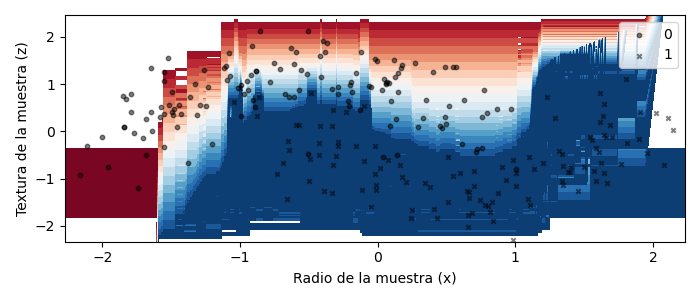

In [32]:
"""
#Inicializando el eje X ordenado
z1_plot = z[:, 0]
z1_plot_ind_sort = np.argsort(z[:, 0])
z1_plot = z1_plot[z1_plot_ind_sort]
z2_plot = z[:, 1]
z2_plot = z2_plot[z1_plot_ind_sort]  


Z1, Z2 = np.meshgrid(z1_plot, z2_plot)

# Visualizamos el resultado
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
for k, (label, marker) in enumerate(zip(['0', '1'], ['o', 'x'])):
    ax.scatter(x[y==k, 0], x[y==k, 1], c='k', s=10, 
               marker=marker, label=label, alpha=0.5)


Z = np.stack((Z1.ravel(), Z2.ravel())).T
Z = Z.copy(order='C')

Y_pred = cython_function(x,y,Z)

ax.contourf(Z1, Z2, np.reshape(Y_pred, Z1.shape), zorder=-1, cmap=plt.cm.RdBu, vmin=0, vmax=1, levels=20)
ax.set_xlim([np.amin(z1_plot), np.amax(z1_plot)])
ax.set_ylim([np.amin(z2_plot), np.amax(z2_plot)])
plt.legend();


In [21]:
z1_plot = z[:, 0]
z1_plot.shape

(750,)

Muestre una gráfica de la frontera de decisión de su clasificador en el rango $[(-2,2), (-2,2)]$

<IPython.core.display.Javascript object>


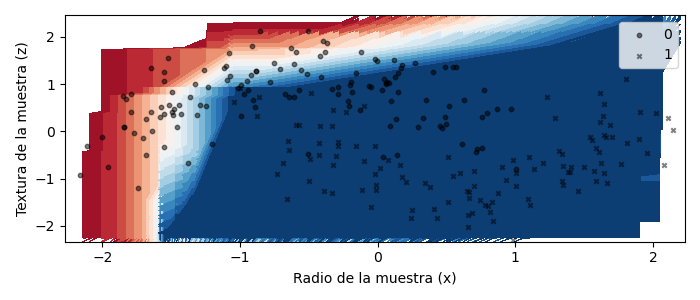

In [33]:
from sklearn.naive_bayes import GaussianNB

#clf = GaussianNB(priors=py) #Usamos los priors calculados antes

#x_plot = np.linspace(np.amin(x[:, 0]), np.amax(x[:, 0]), num=500)
#z_plot = np.linspace(np.amin(x[:, 1]), np.amax(x[:, 1]), num=500)
#y_plot = np.linspace(np.amin(x[:, 1]), np.amax(x[:, 1]), num=500)
#z1_plot = Z[np.argmax(z[:, 1])]


#np.linspace(np.amin(z[:, 0]), np.amax(z[:, 1]), num=500)
#z2_plot = np.linspace(np.amin(z[:, 1]), np.amax(z[:, 1]), num=500)
z1_plot = z[:, 0]
z2_plot = z[:, 1]
Z1, Z2 = np.meshgrid(z1_plot, z2_plot)

# Visualizamos el resultado
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
for k, (label, marker) in enumerate(zip(['0', '1'], ['o', 'x'])):
    ax.scatter(x[y==k, 0], x[y==k, 1], c='k', s=10, 
               marker=marker, label=label, alpha=0.5)

#Y_pred = KNN(x,y,z)
#print(Y_pred)
Z = np.stack((Z1.ravel(), Z2.ravel())).T
Z = Z.copy(order='C')

Y_pred = cython_function(x,y,Z)
#Y = clf.predict(np.stack((X.ravel(), Z.ravel())).T)

ax.contourf(Z1, Z2, np.reshape(Y_pred, Z1.shape), zorder=-1, cmap=plt.cm.RdBu, 
           vmin=0, vmax=1, levels=20)
ax.set_xlim([np.amin(z1_plot), np.amax(z1_plot)])
ax.set_ylim([np.amin(z2_plot), np.amax(z2_plot)])
ax.set_xlabel('Radio de la muestra (x)')
ax.set_ylabel('Textura de la muestra (z)')
plt.legend();

In [40]:
z1_plot = np.linspace(np.amin(z[:, 0]), np.amax(x[:, 1]), num=500)
z2_plot = np.linspace(np.amin(z[:, 0]), np.amax(x[:, 1]), num=500)
Z1,Z2 = np.meshgrid(z1_plot, z2_plot)

print(z1_plot.shape)
Z_ravel = Z1.ravel()
print(Z_ravel)
#print(Z_ravel().shape)

(500,)
[-2.2731285  -2.26432677 -2.25552503 ...  2.10133433  2.11013607
  2.1189378 ]


In [ ]:
np.stack((X.ravel(), Z.ravel())).T.shapenp.linspace(np.amin(x[:, 1]), np.amax(x[:, 1]), num=500)

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB(priors=py) #Usamos los priors calculados antes
clf.fit(x[:, :2], y) # Entrenamos

# Visualizamos el resultado
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
for k, (label, marker) in enumerate(zip(['Sanos', 'Cancer'], ['o', 'x'])):
    ax.scatter(x[y==k, 0], x[y==k, 1], c='k', s=10, 
               marker=marker, label=label, alpha=0.5)

Y = clf.predict_proba(np.stack((X.ravel(), Z.ravel())).T)[:, 1]
#Y = clf.predict(np.stack((X.ravel(), Z.ravel())).T)

ax.contourf(X, Z, np.reshape(Y, X.shape), zorder=-1, cmap=plt.cm.RdBu, 
            vmin=0, vmax=1, levels=20)
ax.set_xlim([np.amin(x_plot), np.amax(x_plot)])
ax.set_ylim([np.amin(z_plot), np.amax(z_plot)])
ax.set_xlabel('Radio de la muestra (x)')
ax.set_ylabel('Textura de la muestra (z)')
plt.legend();

In [ ]:
A = np.array([1,2,3,4,5])
B = np.array([5,6,7,8,9])
np.stack((A,B))